In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder

import klib

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

import datetime

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\Downloads\financial_regression.csv")

In [8]:
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [3]:
df = klib.data_cleaning(df)

Shape of cleaned data: (3719, 44) - Remaining NAs: 84


Dropped rows: 185
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 3
     of which 0 single valued.     Columns: []
Dropped missing values: 19224
Reduced memory by at least: 0.7 MB (-50.0%)



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3719 non-null   string 
 1   sp500_open          3719 non-null   float32
 2   sp500_high          3719 non-null   float32
 3   sp500_low           3719 non-null   float32
 4   sp500_close         3719 non-null   float32
 5   sp500_volume        3719 non-null   float64
 6   sp500_high_low      3719 non-null   float32
 7   nasdaq_open         3719 non-null   float32
 8   nasdaq_high         3719 non-null   float32
 9   nasdaq_low          3719 non-null   float32
 10  nasdaq_close        3719 non-null   float32
 11  nasdaq_volume       3719 non-null   float64
 12  nasdaq_high_low     3719 non-null   float32
 13  usd_chf             3677 non-null   float32
 14  eur_usd             3677 non-null   float32
 15  silver_open         3719 non-null   float32
 16  silver

In [14]:
df.isnull().sum()

date                   0
sp500_open             0
sp500_high             0
sp500_low              0
sp500_close            0
sp500_volume           0
sp500_high_low         0
nasdaq_open            0
nasdaq_high            0
nasdaq_low             0
nasdaq_close           0
nasdaq_volume          0
nasdaq_high_low        0
usd_chf               42
eur_usd               42
silver_open            0
silver_high            0
silver_low             0
silver_close           0
silver_volume          0
silver_high_low        0
oil_open               0
oil_high               0
oil_low                0
oil_close              0
oil_volume             0
oil_high_low           0
platinum_open          0
platinum_high          0
platinum_low           0
platinum_close         0
platinum_volume        0
platinum_high_low      0
palladium_open         0
palladium_high         0
palladium_low          0
palladium_close        0
palladium_volume       0
palladium_high_low     0
gold_open              0


In [15]:
df['usd_chf'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1.0206
1       1.0264
2       1.0340
3       1.0453
4       1.0426
         ...  
3714    0.8654
3715    0.8659
3716       NaN
3717       NaN
3718       NaN
Name: usd_chf, Length: 3719, dtype: float32>

In [4]:
for col in df.columns:
  if df[col].dtype in['object','string','category']:
    df[col].fillna(df[col].mode()[0],inplace=True)
  else:
    df[col].fillna(df[col].mean(),inplace=True)


In [5]:
df.head(3)

,date,sp500_open,sp500_high,sp500_low,sp500_close,sp500_volume,sp500_high_low,nasdaq_open,nasdaq_high,nasdaq_low,...,palladium_high,palladium_low,palladium_close,palladium_volume,palladium_high_low,gold_open,gold_high,gold_low,gold_close,gold_volume
0,2010-01-14,114.489998,115.139999,114.419998,114.930000,115646960.0,0.72,46.259998,46.520000,46.220001,...,45.020000,43.860001,44.840000,364528.0,1.16,111.510002,112.370003,110.790001,112.029999,18305238.0
1,2010-01-15,114.730003,114.839996,113.199997,113.639999,212252769.0,1.64,46.459999,46.549999,45.650002,...,45.759998,44.400002,45.759998,442210.0,1.36,111.349998,112.010002,110.379997,110.860001,18000724.0
2,2010-01-19,113.620003,115.129997,113.589996,115.059998,138671890.0,1.54,45.959999,46.639999,45.950001,...,47.080002,45.700001,46.939999,629150.0,1.38,110.949997,111.750000,110.830002,111.519997,10467927.0


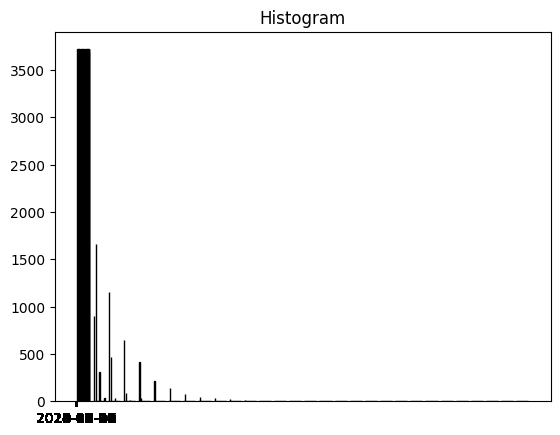

In [22]:
plt.hist(df, bins=30, edgecolor='k')
plt.title('Histogram')
plt.show()

In [6]:
df.head()

,date,sp500_open,sp500_high,sp500_low,sp500_close,sp500_volume,sp500_high_low,nasdaq_open,nasdaq_high,nasdaq_low,...,palladium_high,palladium_low,palladium_close,palladium_volume,palladium_high_low,gold_open,gold_high,gold_low,gold_close,gold_volume
0,2010-01-14,114.489998,115.139999,114.419998,114.930000,115646960.0,0.72,46.259998,46.520000,46.220001,...,45.020000,43.860001,44.840000,364528.0,1.16,111.510002,112.370003,110.790001,112.029999,18305238.0
1,2010-01-15,114.730003,114.839996,113.199997,113.639999,212252769.0,1.64,46.459999,46.549999,45.650002,...,45.759998,44.400002,45.759998,442210.0,1.36,111.349998,112.010002,110.379997,110.860001,18000724.0
2,2010-01-19,113.620003,115.129997,113.589996,115.059998,138671890.0,1.54,45.959999,46.639999,45.950001,...,47.080002,45.700001,46.939999,629150.0,1.38,110.949997,111.750000,110.830002,111.519997,10467927.0
3,2010-01-20,114.279999,114.449997,112.980003,113.889999,216330645.0,1.47,46.270000,46.604000,45.430000,...,47.310001,45.169998,47.049999,643198.0,2.14,109.970001,110.050003,108.459999,108.940002,17534231.0
4,2010-01-21,113.919998,114.269997,111.559998,111.699997,344747028.0,2.71,46.060001,46.349998,45.299999,...,46.980000,45.070000,45.299999,388457.0,1.91,108.480003,108.779999,106.610001,107.370003,25747831.0


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [11]:
df.drop(columns=['date'], inplace=True)

In [12]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [13]:
df.head(3)

,sp500_open,sp500_high,sp500_low,sp500_close,sp500_volume,sp500_high_low,nasdaq_open,nasdaq_high,nasdaq_low,nasdaq_close,...,palladium_volume,palladium_high_low,gold_open,gold_high,gold_low,gold_close,gold_volume,year,month,day
0,-1.270967,-1.270730,-1.265986,-1.267529,0.046746,-0.866654,-1.103567,-1.103690,-1.101662,-1.102769,...,2.991326,-0.429607,-1.146779,-1.133804,-1.154758,-1.128904,1.398865,-1.623071,-1.617481,-0.196942
1,-1.268989,-1.273189,-1.276099,-1.278157,1.446430,-0.520342,-1.101933,-1.103447,-1.106356,-1.107179,...,3.784859,-0.350968,-1.152184,-1.145905,-1.168695,-1.168421,1.349603,-1.623071,-1.617481,-0.082590
2,-1.278136,-1.270812,-1.272866,-1.266458,0.380345,-0.557985,-1.106017,-1.102718,-1.103885,-1.101136,...,5.694478,-0.343105,-1.165698,-1.154644,-1.153399,-1.146129,0.131002,-1.623071,-1.617481,0.374820


In [15]:
x = df.drop(columns=['gold_high'])
y = df['gold_high']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [49]:
lgb_model = LGBMRegressor()
gb_model = GradientBoostingRegressor()
xgb_model = XGBRegressor()

In [ ]:
param_dist={
  'max_depth':[None, 5, 10, 15],
  'min_samples_split':[4,6,8],
  'min_samples_leaf':[2,4,6],
  'max_features':[None,'sqrt','log2']
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

In [55]:
random_search = RandomizedSearchCV(
  estimator=xgb_model,
  param_distributions=param_dist,
  n_iter=20,
  cv=5,
  refit='r2',
  scoring={'mse':mse_scorer,'r2':r2_scorer},
  random_state=42,
  n_jobs=-1,
)

In [56]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [4, 6, 8]},
                   random_state=42, refit='r2',
                   scoring={'mse': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                            'r2': make_scorer(r2_score, response_method='predict')})

In [57]:
random_search.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10}

In [58]:
y_pred = random_search.predict(x_val)

In [ ]:
lgb_mse = mean_squared_error(y_val, y_pred)
lgb_r2 = r2_score(y_val, y_pred)

In [48]:
print(f"Validation MSE: {lgb_mse: .4f}")
print(f"Validation R2: {lgb_r2: .4f}")

Validation MSE:  0.0006
Validation R2:  0.9994


In [ ]:
gb_mse = mean_squared_error(y_val, y_pred)
gb_r2 = r2_score(y_val, y_pred)

print(f"Validation MSE: {gb_mse: .4f}")
print(f"Validation R2: {gb_r2: .4f}")

Validation MSE:  0.0002
Validation R2:  0.9998


In [59]:
xgb_mse = mean_squared_error(y_val, y_pred)
xgb_r2 = r2_score(y_val, y_pred)

print(f"Validation MSE: {xgb_mse: .4f}")
print(f"Validation R2: {xgb_r2: .4f}")

Validation MSE:  0.0005
Validation R2:  0.9995


In [61]:
from tabulate import tabulate

In [67]:
headers=['Model', 'MSE', 'R2']

data = [
  ['LighGBM', lgb_mse, lgb_r2],
  ['GBM', gb_mse, gb_r2],
  ['XGBoost', xgb_mse, xgb_r2],
]

results = tabulate(data, headers, tablefmt='grid')
print(results)

+---------+-------------+----------+
| Model   |         MSE |       R2 |
+=========+=============+==========+
| LighGBM | 0.000623065 | 0.999448 |
+---------+-------------+----------+
| GBM     | 0.000214354 | 0.99981  |
+---------+-------------+----------+
| XGBoost | 0.000546282 | 0.999516 |
+---------+-------------+----------+
